In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
import nltk

from nltk.tokenize import word_tokenize
import string

from string import digits
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

## Read in Data and  Filter

In [592]:
df = pd.read_csv("final_proj_data222.csv")

In [593]:
def ny_region(x):
    if "nyregion" in x:
        return True
    else:
        return False

In [594]:
df["ny_region"] = df["url"].apply(lambda x: ny_region(x))

In [595]:
df["ny_region"].mean()

0.07276861853325753

In [596]:
df = df[df["ny_region"]==False]

In [597]:
df.shape

(8155, 13)

In [603]:
df.drop("Unnamed: 0", inplace=True, axis=1)

In [604]:
df = df[~df["text"].isna()]

## Define Stopwords, Preprocessing

In [598]:
stop_words = stopwords.words('english')

specific_sw = ["theater","feel", "us", "work", "woman", "man", "women", "men", "juliet", "romeo", "nurse", "product", "production", "company", "compani", "park", "rose", "william", "tennesse", "tennessee", "gypsi", "lupon", "sondheim", "mari", "elizabeth", "irish", "ireland", "reperatory", "repertori", "dublin", "page", "queen", "jane", "brown", 
 '’', '“', '”', "-",'—', '"',"production", "actors", "actress", "actresses", "perform", "make", "even", "direct", "actor", "audience","lincoln",  "lincoln center", "brooklyn academy","shakespeare", "set","new", "time", "like", "samuel", "beckett", "samuel beckett","character","musical","manhattan club", "say", "seem", "ibsen", 'open', 'london', 'peter', 'scene','jame', 'present', 'jack', 'miller', 'th', 'lee', 'frank', 'ann', 'execut', 'paul', 'barri', 'adam', 'brian', 'last', 'charl', 'susan',
"lincoln center","center", "ms", "mr", 'laurenc','shakespear', "stori", 'balconi', 'fight', 'ladi', 'two', 'version', 'teenag', 'cast', 'role',"play", "director", "show", "one","characters", "stage",'academi', 'arent', 'brooklyn', 'club', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'hasnt', 'havent', 'isnt', 'manhattan', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldv', 'thatll', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youv', "henry", "henry", "richard", "v", "iii", "shaw", "mrs", "george", "georg", "bernard", "chekhov", "sister", "russian", "cherry", "cherri", "russian", "three", "nina", "uncle", "uncl", "vanya", "hamlet", "shakespeare", "broadway", "lear", "king", "edgar", "earl", "macbeth", "get", "thing", "go", "know", "wilson", "august", "hill", "willi", "word", "never", "though", "manag", "david", "michael", "street", "john", "artist","sens", "way", "people", "yet", "peopl", 'produc', 'associ', 'light', 'west', 'robert','costum','mark', 'tom', 'j', 'la',"piece", "piec", 'east', 'mama''execut', 'christoph', 'maxwel', 'jim', 'cowboy', 'space', 'neill','scott', 'c', 'rosemari', 'box', 'simpson', 'gari', 'peopl', 'joe', 'jan', 'nelson', 'soho', 'usual', 'indian', 'kevin', 'w','rosemari', 'box', 'simpson', 'gari',  'joe', 'jan', 'nelson', 'soho', 'usual', 'indian', 'kevin', 'w',"sens", "way", "people", "yet", "peopl", 'harri', 'albe', 'alic', 'edward', 'martha', 'delic', 'woolf', 'virginia','lane', 'stoppard', 'martin', 'reviv', 'billi', 'afraid', 'jean', 'clair']
for word in specific_sw:
    stop_words.append(word) 


In [599]:
def custom_tokenizer(text):

    # remove punctuation
    remove_punct = str.maketrans('', '', string.punctuation)
    text = text.translate(remove_punct)

    # remove digits and convert to lower case
    remove_digits = str.maketrans('', '', string.digits)
    text = text.lower().translate(remove_digits)

    # tokenize
    tokens = word_tokenize(text)

    # remove stop words
    tokens_stop = [y for y in tokens if y not in stop_words]

    # stem
    stemmer = SnowballStemmer('english')
    tokens_stem = [stemmer.stem(y) for y in tokens_stop] 

    return tokens_stem

In [633]:
from sklearn.feature_extraction.text import  TfidfVectorizer 

tfidf = TfidfVectorizer(tokenizer = custom_tokenizer,stop_words = stop_words, token_pattern = "\\b[a-zA-Z][a-zA-Z]+\\b", min_df = .01, max_df = .9)
tfidf_vecs = tfidf.fit_transform(df["text"])

In [615]:
tfidf_2 = tfidf_vecs.todense()

In [1221]:
tfidf_df2 = pd.DataFrame(tfidf_vecs.todense(), columns = tfidf.get_feature_names())

In [617]:
tfidf_df.shape

(8107, 4635)

## NMF

In [618]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=20)
nmf_vecs = nmf.fit_transform(tfidf_vecs)

In [619]:
topic_words = []
for r in nmf.components_:
    a = sorted([(v,i) for i,v in enumerate(r)],reverse=True)[0:20]
    topic_words.append([tfidf_df.iloc[:,a[e][1]].name for e in range(len(a))])

In [620]:
for i in topic_words:
    print(i)

['mind', 'night', 'alway', 'see', 'first', 'think', 'come', 'might', 'would', 'moment', 'within', 'seen', 'year', 'includ', 'also', 'portray', 'everi', 'embodi', 'exist', 'look']
['song', 'sing', 'music', 'singer', 'number', 'band', 'lyric', 'rock', 'love', 'voic', 'revu', 'blue', 'tune', 'compos', 'piano', 'pop', 'record', 'ballad', 'sung', 'guitar']
['art', 'video', 'narrat', 'novel', 'project', 'imag', 'festiv', 'part', 'screen', 'text', 'design', 'experi', 'creat', 'theatric', 'sometim', 'voic', 'adapt', 'use', 'tale', 'music']
['famili', 'father', 'mother', 'son', 'daughter', 'brother', 'home', 'parent', 'hous', 'children', 'child', 'mom', 'die', 'live', 'dad', 'foot', 'sibl', 'husband', 'memori', 'yearold']
['comedi', 'joke', 'good', 'would', 'funni', 'much', 'laugh', 'line', 'lot', 'call', 'tri', 'enough', 'someth', 'name', 'realli', 'bit', 'script', 'end', 'think', 'talk']
['polit', 'american', 'presid', 'histori', 'public', 'state', 'bush', 'cultur', 'countri', 'nation', 'unit

In [635]:
#assign docs to max nmf vector
doc_cluster = nmf_vecs.argmax(axis = 1)

In [636]:
print(doc_cluster.shape)
print(df.shape)

(8107,)
(8107, 12)


In [637]:
df.columns

Index(['headline', 'keyword', 'pub_date', 'type_mat', 'url', 'word_count',
       'pub_date_2', 'pub_date_3', 'year', 'is_theat', 'text', 'ny_region'],
      dtype='object')

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [638]:
clusters1 = pd.DataFrame(doc_cluster)

In [639]:
print(clusters1.shape)

clusters1.reset_index(inplace=True)

(8107, 1)


In [665]:
df.drop("index", axis=1, inplace=True)

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [666]:
df.reset_index(inplace=True)

In [668]:
df2 = df.merge(clusters1, how="outer", on="index")

In [669]:
df2.columns

Index([     'index',   'headline',    'keyword',   'pub_date',   'type_mat',
              'url', 'word_count', 'pub_date_2', 'pub_date_3',       'year',
         'is_theat',       'text',  'ny_region',            0],
      dtype='object')

In [670]:
df2.columns = [ 'index',   'headline',    'keyword',   'pub_date',   'type_mat',
              'url', 'word_count', 'pub_date_2', 'pub_date_3',       'year',
         'is_theat',       'text',  'ny_region',            "cat"]

In [732]:
df2["cat2"]  = df2["cat"]

In [671]:
cats = df2.groupby("cat").headline.count().reset_index()

In [672]:
cats["headline"].sum()

8107

In [751]:
df2.shape

(8107, 15)

In [673]:
cats["perc"] = cats["headline"]/8107

<Container object of 20 artists>

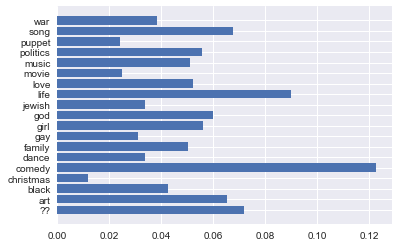

In [674]:
plt.barh(["??", "song", "art", "family", "comedy", "politics", "love", "movie", "christmas", "girl", "puppet", "life", "war", "music", "black", "dance", "gay", "jewish", "??", "god"],cats["perc"])

## Recommendation

In [675]:
nmf_vecs.shape

(8107, 20)

In [676]:
tfidf_vecs.todense().shape

(8107, 4635)

In [707]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix of tfidf
cosine_sim = linear_kernel(tfidf_vecs.todense(), tfidf_vecs.todense())

In [685]:
#Compute the cosine similarity matrix of nmf vectors
cosine_sim2 = linear_kernel(nmf_vecs, nmf_vecs)

In [678]:
#create mapping of reviews to indices
indices = pd.DataFrame(df2.index, index=df2['headline']).drop_duplicates()

In [679]:
indices.shape

(8107, 1)

In [747]:
def get_recommendations(title, cosine_sim=cosine_sim2):
    idx = indices.get_value(index=title, col=0)

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:5]

    rec_indices = [i[0] for i in sim_scores]

    return df2['headline'].iloc[rec_indices]

In [748]:
get_recommendations("In 'Spring Awakening,' a Rock 'n' Roll Heartbeat for 19th-Century German Schoolboys", cosine_sim = cosine_sim2)




/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


5821    Review: ‘School Girls’ Is a Gleeful African Ma...
7768                      When Mean Girls Are Not Stopped
297      A Dated Musical Whose Music Is Never Out of Date
928                      A Songwriter Who Found Her Voice
Name: headline, dtype: object

In [752]:
get_recommendations("In 'Spring Awakening,' a Rock 'n' Roll Heartbeat for 19th-Century German Schoolboys", cosine_sim = cosine_sim)


/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


3203            Injecting Real Youth Into a Youthful Show
4322    Popping Broadway’s Bubbles, One Hit Musical at...
6605    Stomping Onto Broadway With a Punk Temper Tantrum
6566    Staging Youth’s Existential Quest With Green D...
Name: headline, dtype: object

## Filter Out Bad Categories

In [953]:
df4 = df2[df2["cat2"]!=0]

In [954]:
df4.cat2.nunique()

19

In [955]:
df4 = df4[df4["cat2"]!=18]

In [956]:
df4.cat2.nunique()

18

In [1054]:
data_for_scat = df4.groupby(["year", "cat2"])["headline"].count().reset_index()

In [1072]:
categ = ["Song", "Art", "Family", "Comedy", "Politics", "Love", "Movie", "Christmas", "Adolescent", "Puppet", "Drama", "War" ,"Black", "Dance", "Gay", "Jewish"]

data_for_scat.loc[(data_for_scat.cat2==19), 'categories'] = "God"


In [1115]:
data_for_scat.loc[(data_for_scat.year==2018), 'perc'] = data_for_scat["headline"]/285

In [1144]:
data_for_scat.to_csv("cat_by_year.csv")

In [1042]:
#combine 2 music categories into one
df4.loc[(df4.cat2==13), "cat2"]=1

In [1053]:
# cat_perc10.to_csv("cat_perc.csv")

## Flask App

In [1242]:
from flask import Flask, redirect, url_for, request, render_template
app = Flask(__name__)

@app.route('/success/')
@app.route('/success/<name>')
def success(name):
    x = get_recommendations(name, cosine_sim = cosine_sim2)
    my_rec = [x.iloc[0], x.iloc[1], x.iloc[2]]
    return render_template('success.html', res=my_rec)

    
@app.route('/login',methods = ['POST', 'GET'])
def login():
   if request.method == 'POST':
      user = request.form['nm']
      return redirect(url_for('success',name = user))
   else:
      user = request.args.get('nm')
      return redirect(url_for('success',name = user))

if __name__ == '__main__':
   app.run()

2018-11-16 07:48:05,207 : INFO :  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
2018-11-16 07:48:11,660 : INFO : 127.0.0.1 - - [16/Nov/2018 07:48:11] "POST /login HTTP/1.1" 302 -
/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
2018-11-16 07:48:11,744 : INFO : 127.0.0.1 - - [16/Nov/2018 07:48:11] "GET /success/In%20%27Spring%20Awakening%2C%27%20a%20Rock%20%27n%27%20Roll%20Heartbeat%20for%2019th-Century%20German%20Schoolboys HTTP/1.1" 200 -
2018-11-16 07:49:54,701 : INFO : 127.0.0.1 - - [16/Nov/2018 07:49:54] "POST /login HTTP/1.1" 302 -
2018-11-16 07:49:55,069 : INFO : 127.0.0.1 - - [16/Nov/2018 07:49:55] "GET /success/In%20%27Spring%20Awakening%2C%27%20a%20Rock%20%27n%27%20Roll%20Heartbeat%20for%2019th-Century%20German%20Schoolboy

## Break Down by Sentence

In [185]:
df["sentence"] = df["text"].apply(lambda x: x.split("."))

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [212]:
sen_df = pd.DataFrame(df["sentence"])

In [220]:
sen_df = pd.DataFrame(df["text"])

In [214]:
s = sen_df.apply(lambda x: pd.Series(sen_df['sentence']),axis=1).stack().reset_index(level=1, drop=True)

In [227]:
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    row_accumulator = []

    def splitListToRows(row, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)

    df.apply(splitListToRows, axis=1, args = (separator, ))
    new_df = pd.DataFrame(row_accumulator)
    return new_df

In [229]:
split_df2 = splitDataFrameList(df2, "text", ".")

In [234]:
split_df2

,art_len,cat,headline,index,is_theat,keyword,level_0,ny_region,pub_date,pub_date_2,pub_date_3,sec_cluster,text,type_mat,url,word_count,year
0,1199.0,3,"A Universal Heart, Pounding With Hope",0,True,"[{'name': 'subject', 'value': 'Theater', 'rank...",0,False,2014-10-25T00:00:00Z,2014-10-25,2014-10-25,3,The stage of the Harvey Theater has surely nev...,Review,https://www.nytimes.com/2014/10/25/theater/ivo...,1193,2014
1,1199.0,3,"A Universal Heart, Pounding With Hope",0,True,"[{'name': 'subject', 'value': 'Theater', 'rank...",0,False,2014-10-25T00:00:00Z,2014-10-25,2014-10-25,3,With no scenery to speak of except for one fe...,Review,https://www.nytimes.com/2014/10/25/theater/ivo...,1193,2014
2,1199.0,3,"A Universal Heart, Pounding With Hope",0,True,"[{'name': 'subject', 'value': 'Theater', 'rank...",0,False,2014-10-25T00:00:00Z,2014-10-25,2014-10-25,3,You imagine how lonely it must feel to be up ...,Review,https://www.nytimes.com/2014/10/25/theater/ivo...,1193,2014
3,1199.0,3,"A Universal Heart, Pounding With Hope",0,True,"[{'name': 'subject', 'value': 'Theater', 'rank...",0,False,2014-10-25T00:00:00Z,2014-10-25,2014-10-25,3,"That naked space is also a mirror, accurate a...",Review,https://www.nytimes.com/2014/10/25/theater/ivo...,1193,2014
4,1199.0,3,"A Universal Heart, Pounding With Hope",0,True,"[{'name': 'subject', 'value': 'Theater', 'rank...",0,False,2014-10-25T00:00:00Z,2014-10-25,2014-10-25,3,"I mean New York, or any of those densely crow...",Review,https://www.nytimes.com/2014/10/25/theater/ivo...,1193,2014
5,1199.0,3,"A Universal Heart, Pounding With Hope",0,True,"[{'name': 'subject', 'value': 'Theater', 'rank...",0,False,2014-10-25T00:00:00Z,2014-10-25,2014-10-25,3,Trying to make contact within this abyss — an...,Review,https://www.nytimes.com/2014/10/25/theater/ivo...,1193,2014
6,1199.0,3,"A Universal Heart, Pounding With Hope",0,True,"[{'name': 'subject', 'value': 'Theater', 'rank...",0,False,2014-10-25T00:00:00Z,2014-10-25,2014-10-25,3,Those of us lucky enough to see this producti...,Review,https://www.nytimes.com/2014/10/25/theater/ivo...,1193,2014
7,1199.0,3,"A Universal Heart, Pounding With Hope",0,True,"[{'name': 'subject', 'value': 'Theater', 'rank...",0,False,2014-10-25T00:00:00Z,2014-10-25,2014-10-25,3,Mr,Review,https://www.nytimes.com/2014/10/25/theater/ivo...,1193,2014
8,1199.0,3,"A Universal Heart, Pounding With Hope",0,True,"[{'name': 'subject', 'value': 'Theater', 'rank...",0,False,2014-10-25T00:00:00Z,2014-10-25,2014-10-25,3,van Hove is a practitioner of extreme theatri...,Review,https://www.nytimes.com/2014/10/25/theater/ivo...,1193,2014
9,1199.0,3,"A Universal Heart, Pounding With Hope",0,True,"[{'name': 'subject', 'value': 'Theater', 'rank...",0,False,2014-10-25T00:00:00Z,2014-10-25,2014-10-25,3,"He presents classics in the altogether, witho...",Review,https://www.nytimes.com/2014/10/25/theater/ivo...,1193,2014


In [235]:
from sklearn.feature_extraction.text import  TfidfVectorizer 

tfidf = TfidfVectorizer(tokenizer = custom_tokenizer,stop_words = stop_words, token_pattern = "\\b[a-zA-Z][a-zA-Z]+\\b", min_df = .01, max_df = .9)
tfidf_vecs = tfidf.fit_transform(split_df2["text"])

/Users/elizabethoriordan/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['product'] not in stop_words.
  sorted(inconsistent))


In [236]:
tfidf_2 = tfidf_vecs.todense()

tfidf_df = pd.DataFrame(tfidf_vecs.todense(), columns = tfidf.get_feature_names())


In [237]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=20)
nmf_vecs = nmf.fit_transform(tfidf_vecs)

In [238]:
doc_cluster = nmf_vecs.argmax(axis = 1)

doc_cluster.shape


(315372,)

In [239]:
split_df2.shape

(315372, 17)

In [240]:
split_df2.columns

Index(['art_len', 'cat', 'headline', 'index', 'is_theat', 'keyword', 'level_0',
       'ny_region', 'pub_date', 'pub_date_2', 'pub_date_3', 'sec_cluster',
       'text', 'type_mat', 'url', 'word_count', 'year'],
      dtype='object')

In [241]:
split_df2.drop(["level_0", "index"], axis=1, inplace=True)

In [242]:
clusters1 = pd.DataFrame(doc_cluster)

In [243]:
clusters1.shape

(315372, 1)

In [244]:
clusters1.reset_index(inplace=True)

In [245]:
split_df2.reset_index(inplace=True)

In [246]:
df3 = split_df2.merge(clusters1, how="outer", on="index")

In [247]:
df3.shape

(315372, 17)

In [248]:
topic_words = []
for r in nmf.components_:
    a = sorted([(v,i) for i,v in enumerate(r)],reverse=True)[0:7]
    topic_words.append([tfidf_df.iloc[:,a[e][1]].name for e in range(len(a))])

for i in topic_words:
    print(i)

['product', 'manag', 'compani', 'broadway', 'cast', 'york', 'design']
['two', 'year', 'young', 'role', 'includ', 'name', 'song']
['street', 'broadway', 'york', 'place', 'american', 'compani', 'john']
['also', 'includ', 'cast', 'whose', 'broadway', 'name', 'song']
['work', 'whose', 'year', 'compani', 'includ', 'well', 'american']
['present', 'artist', 'compani', 'york', 'manag', 'part', 'american']
['music', 'light', 'sound', 'costum', 'manag', 'david', 'design']
['much', 'give', 'act', 'sens', 'could', 'word', 'point']
['feel', 'often', 'still', 'us', 'moment', 'sens', 'end']
['life', 'give', 'sens', 'woman', 'year', 'end', 'famili']
['love', 'song', 'woman', 'young', 'mother', 'famili', 'thing']
['come', 'moment', 'end', 'see', 'word', 'often', 'go']
['first', 'act', 'year', 'end', 'broadway', 'york', 'see']
['way', 'find', 'give', 'long', 'mani', 'go', 'anoth']
['man', 'young', 'woman', 'name', 'whose', 'call', 'john']
['take', 'place', 'turn', 'long', 'us', 'act', 'role']
['open', '